# Find optimal features in the Resume csv

This notebook will open a csv and create plots to compare clusters of features and choose optimal features

In [45]:
import pandas as pd

In [51]:
import graphviz

In [52]:
import math

In [53]:
import pydotplus


In [54]:
import matplotlib.pyplot as plt

In [55]:
import numpy as np

In [56]:
from sklearn import tree

In [57]:
from sklearn.externals.six import StringIO

In [60]:
import pydot

In [61]:
from sklearn.tree import DecisionTreeClassifier 

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
from IPython.display import Image

In [64]:
table = pd.read_csv("Resume.csv")
#table

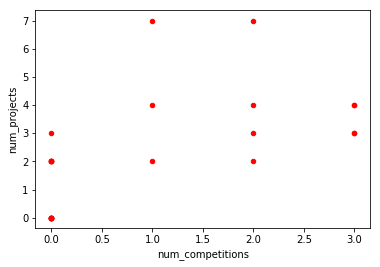

In [65]:
table.plot.scatter(x = "num_competitions", y = "num_projects", c = "Red")

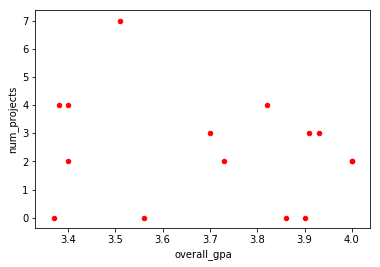

In [66]:
table.plot.scatter(x = "overall_gpa", y = "num_projects", c = "Red")

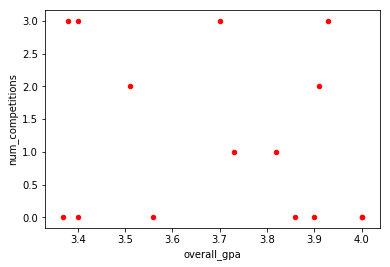

In [67]:
table.plot.scatter(x = "overall_gpa", y = "num_competitions", c = "Red")

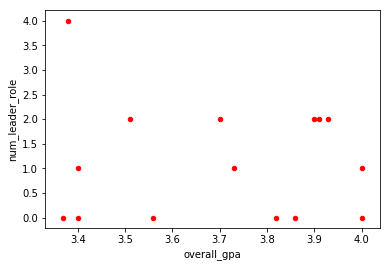

In [68]:
table.plot.scatter(x = "overall_gpa", y = "num_leader_role", c = "Red")

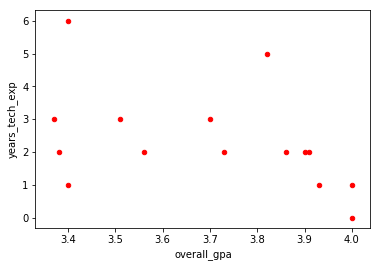

In [69]:
table.plot.scatter(x = "overall_gpa", y = "years_tech_exp", c = "Red")

# Non of the Scatter Plots are correlating. Thus, moving onwards to Histograms

1. Bnary Table

In [70]:
a1 = table.iloc[0:len(table),6:51]

In [71]:
a2 = table.iloc[0:len(table),52:53]

In [72]:
a3 = table.iloc[0:len(table),54:55]

In [73]:
a4 = table.iloc[0:len(table),56:58]

In [74]:
a5 = table.iloc[0:len(table),60:61]

In [75]:
a6 = table.iloc[0:len(table),62:63]

In [76]:
a8 = table.iloc[0:len(table),68:72]

In [77]:
a9 = table.iloc[0:len(table),76:77]

In [78]:
sai01 = table.iloc[:,2]#years in school, overalll gpa, # of projects, number of competitions # of awards

In [79]:
sai02 = table.iloc[:,4]

In [80]:
sai03 = table.iloc[:,51]

In [81]:
sai04 = table.iloc[:,53]

In [82]:
# sai05 = table.iloc[:,55]

In [83]:
# sai06 = table.iloc[:,0]

In [84]:
# sai = pd.concat([sai01,sai02,sai03,sai04,sai05], axis = 1)

In [85]:
# sai.to_csv("sai_features.csv")
# sai

In [86]:
# sai
# yerra = pd.concat([(sai[i].apply(lambda x: 0 if math.isnan(x) else x)) for i in list(sai)], axis = 1)
# yerra

In [87]:
binary = pd.concat([a1,a2,a3,a4,a5,a6,a8,a9], axis = 1)

In [88]:
a = pd.concat([(binary[i].apply(lambda x: 1 if x == "Yes" else 0)) for i in list(binary)], axis = 1)
b = pd.concat([table.iloc[:,0:1],a], axis = 1)

In [89]:
b.to_csv("binary.csv")

In [115]:
b.columns

Index(['filename', 'shows_gpa', 'took_algorithms', 'took_data_science',
       'took_security', 'took_data_structures', 'took_databases', 'took_oop',
       'took_swe', 'knows_vcs', 'knows_android', 'knows_ios',
       'knows_debugging', 'knows_testing', 'knows_devops', 'knows_frontend',
       'knows_ml', 'knows_sql', 'knows_nosql', 'knows_bash', 'knows_java',
       'knows_python', 'knows_cpp', 'knows_csharp', 'knows_c', 'knows_js',
       'knows_nodejs', 'knows_vb', 'knows_haskell', 'knows_ocaml', 'knows_php',
       'knows_matlab', 'knows_photoshop', 'knows_mathematica', 'knows_web',
       'knows_unity', 'knows_docker', 'knows_dotnet', 'knows_arduino',
       'knows_pi', 'knows_cloud', 'knows_ruby', 'knows_julia', 'knows_groovy',
       'knows_kotlin', 'has_projects', 'has_competitions', 'has_awards',
       'has_non_tech_exp', 'has_tech_exp', 'has_leader_role',
       'has_member_role', 'is_transfer', 'has_volunteer_exp', 'has_github',
       'has_errors', 'is_foreign'],
      dt

Decision Tree Classifier

In [117]:
columns = list(b[:])[1:]
columns

['shows_gpa',
 'took_algorithms',
 'took_data_science',
 'took_security',
 'took_data_structures',
 'took_databases',
 'took_oop',
 'took_swe',
 'knows_vcs',
 'knows_android',
 'knows_ios',
 'knows_debugging',
 'knows_testing',
 'knows_devops',
 'knows_frontend',
 'knows_ml',
 'knows_sql',
 'knows_nosql',
 'knows_bash',
 'knows_java',
 'knows_python',
 'knows_cpp',
 'knows_csharp',
 'knows_c',
 'knows_js',
 'knows_nodejs',
 'knows_vb',
 'knows_haskell',
 'knows_ocaml',
 'knows_php',
 'knows_matlab',
 'knows_photoshop',
 'knows_mathematica',
 'knows_web',
 'knows_unity',
 'knows_docker',
 'knows_dotnet',
 'knows_arduino',
 'knows_pi',
 'knows_cloud',
 'knows_ruby',
 'knows_julia',
 'knows_groovy',
 'knows_kotlin',
 'has_projects',
 'has_competitions',
 'has_awards',
 'has_non_tech_exp',
 'has_tech_exp',
 'has_leader_role',
 'has_member_role',
 'is_transfer',
 'has_volunteer_exp',
 'has_github',
 'has_errors',
 'is_foreign']

In [92]:
re = pd.read_csv("answers.csv")
red

NameError: name 'red' is not defined

In [93]:
target = pd.read_csv("answers.csv")
#target

In [94]:
target_labels = list(target[:])[1:]
binary_labels = list(b["filename"])
binary_labels
features = []
for i in target_labels:
    k = 0
    for j in binary_labels:
        if((i.split("_")[0]) == j):
            features.append([b[l][k] for l in b][1:])
        k += 1

In [118]:
targets = []
for j in range(len(target)):
    targets.append([target[i][j] for i in target][1:])

In [105]:
A_NUMBER = "A20349472"
random_state_2 = int(A_NUMBER[6:9])
train_ac = np.zeros(len(targets))
for q in range(len(targets)):
    model = DecisionTreeClassifier(max_depth = 3,random_state = random_state_2)
    result = model.fit(features,targets[q])
    if(q == len(targets)-1):
#         dot_data = tree.export_graphviz(result, out_file=None)
#         graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
#         Image(graph.create_png())
        dot_data = StringIO()  
        tree.export_graphviz(model, out_file=dot_data, feature_names=columns)  
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        Image(graph.create_png()) 
        #dot_data = StringIO()
        #tree.export_graphviz(result,out_file = "tree_1.dot")
        #print(dot_data.getvalue())
    n_nodes = model.tree_.node_count
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    feature = model.tree_.feature
    threshold = model.tree_.threshold


    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has %s nodes and has "
          "the following tree structure:"
          % n_nodes)
    for i in range(n_nodes):
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                  "node %s."
                  % (node_depth[i] * "\t",
                     i,
                     children_left[i],
                     feature[i],
                     threshold[i],
                     children_right[i],
                     ))
    print()

    # First let's retrieve the decision path of each sample. The decision_path
    # method allows to retrieve the node indicator functions. A non zero element of
    # indicator matrix at the position (i, j) indicates that the sample i goes
    # through the node j.

    node_indicator = model.decision_path(features)

    # Similarly, we can also have the leaves ids reached by each sample.

    leave_id = model.apply(features)

    # Now, it's possible to get the tests that were used to predict a sample or
    # a group of samples. First, let's make it for the sample.

    sample_id = 0
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('Rules used to predict sample %s: ' % sample_id)
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (features[sample_id][feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)/t %s"
              % (node_id,
                 sample_id,
                 feature[node_id],
                 features[sample_id][feature[node_id]],
                 threshold_sign,
                 threshold[node_id],
                 columns[feature[node_id]]))

    # For a group of samples, we have the following common node.
    sample_ids = [0, 1]
    common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                    len(sample_ids))

    common_node_id = np.arange(n_nodes)[common_nodes]

    print("\nThe following samples %s share the node %s in the tree"
          % (sample_ids, common_node_id))
    print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 9 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 44] <= 0.5 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 5] <= 0.5 else to node 6.
		node=3 test node: go to node 4 if X[:, 21] <= 0.5 else to node 5.
			node=4 leaf node.
			node=5 leaf node.
		node=6 test node: go to node 7 if X[:, 55] <= 0.5 else to node 8.
			node=7 leaf node.
			node=8 leaf node.

Rules used to predict sample 0: 
decision id node 0 : (X_test[0, 44] (= 1) > 0.5)/t has_projects
decision id node 2 : (X_test[0, 5] (= 0) <= 0.5)/t took_databases
decision id node 3 : (X_test[0, 21] (= 1) > 0.5)/t knows_cpp

The following samples [0, 1] share the node [0] in the tree
It is 11.11111111111111 % of all nodes.
The binary tree structure has 11 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 45] <= 0.5 else to node 4.
	node=1 test node: go to node 2 if X[:, 7] <= 0.5 else to node 3.
		node=2 leaf node

In [106]:
print("1. precesion helps explain rules")
print("2. Low specificity capture their negative bais")
print("3. accuracy is realtive random_state (If most of resume rejected, the accuracy is high) compare with acceptance rate")
print("4. High recall helps capture their positive bais (TNR))")

1. precesion helps explain rules
2. Low specificity capture their negative bais
3. accuracy is realtive random_state (If most of resume rejected, the accuracy is high) compare with acceptance rate
4. High recall helps capture their positive bais (TNR))


In [107]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="has_competitions <= 0.5\\ngini = 0.461\\nsamples = 25\\nvalue = [9, 16]"] ;\n1 [label="knows_sql <= 0.5\\ngini = 0.444\\nsamples = 12\\nvalue = [8, 4]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="took_algorithms <= 0.5\\ngini = 0.32\\nsamples = 10\\nvalue = [8, 2]"] ;\n1 -> 2 ;\n3 [label="gini = 0.198\\nsamples = 9\\nvalue = [8, 1]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n2 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n1 -> 5 ;\n6 [label="took_security <= 0.5\\ngini = 0.142\\nsamples = 13\\nvalue = [1, 12]"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="gini = 0.0\\nsamples = 12\\nvalue = [0, 12]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n6 -> 8 ;\n}'

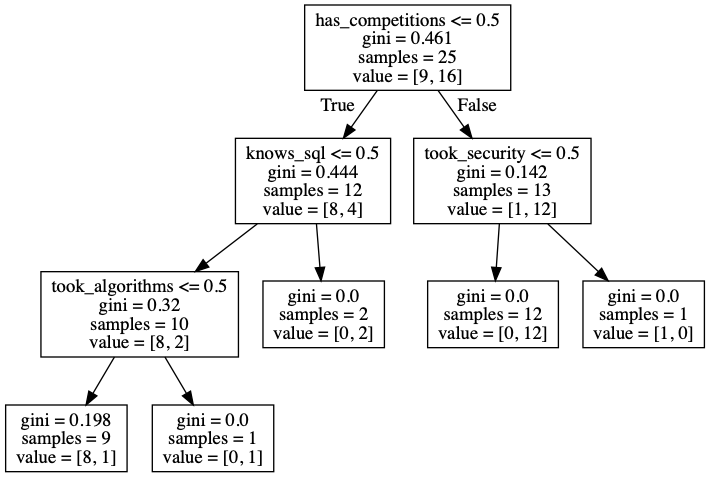

In [108]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [133]:
b = pd.read_csv("binary.csv")
target = pd.read_csv("answers.csv")
targets = []
for j in range(len(target)):
    targets.append([target[i][j] for i in target][1:])
    target_labels = list(target[:])[1:]
    binary_labels = list(b["filename"])
    features = []
    for i in target_labels:
        k = 0
        for j in binary_labels:
            if((i.split("_")[0]) == j):
                features.append([b[l][k] for l in b][1:])
            k += 1
features = [f[1:] for f in features]
# list(target[:])[1:]
# targets

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1,1,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
2,1,1,1,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,1,0,0,1,0,1,0,1,1,...,1,1,1,1,1,0,0,1,0,0
4,1,0,0,0,0,0,1,0,1,0,...,1,0,1,1,1,0,0,0,0,0
5,1,0,0,0,1,1,1,0,1,1,...,1,0,1,1,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,1,1,0,1,1,1,1,1,0,1,...,1,1,1,0,1,0,0,1,0,0
8,1,0,0,0,0,0,1,0,1,0,...,1,1,1,0,1,0,0,1,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [134]:
def data (a):
    b = pd.read_csv("binary.csv")
    target = pd.read_csv("answers.csv")
    targets = []
    for j in range(len(target)):
        targets.append([target[i][j] for i in target][1:])
    target_labels = list(target[:])[1:]
    binary_labels = list(b["filename"])
    features = []
    for i in target_labels:
        k = 0
        for j in binary_labels:
            if((i.split("_")[0]) == j):
                features.append([b[l][k] for l in b][1:])
            k += 1
    features = [f[1:] for f in features]
    A_NUMBER = "A20349472"
    random_state_2 = int(A_NUMBER[6:9])
    model = DecisionTreeClassifier(max_depth = 3,random_state = random_state_2)
    result = model.fit(features,targets[a])
    dot_data = StringIO()  
    tree.export_graphviz(model, out_file=dot_data, feature_names=columns)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    Image(graph.create_png()) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

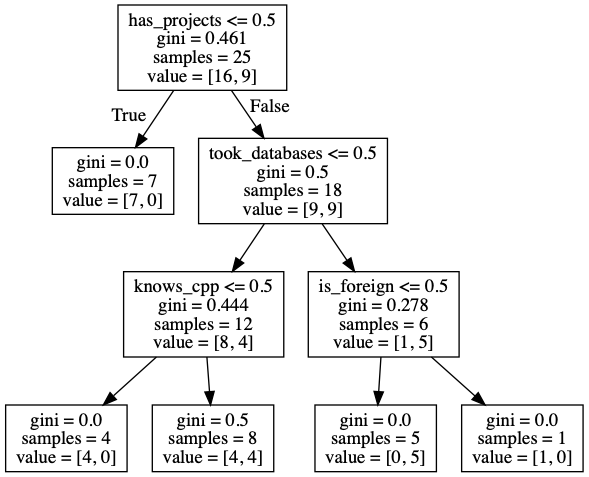

In [135]:
data(0)